 <p style="margin: 0; padding: 0; background-color: black; color: white; text-align: left; font-size: 2em; padding: 20px;">
  Visualize </p>

## Load Important Libraries and Data

In [1]:
# import the important libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

# load the data
df = pd.read_excel(r'C:\Users\MohammedR\Desktop\IABAC PROJECT\data\processed\INX_future_inc_employee_cleaned_dataset.xlsx')

# loading bokeh
from bokeh.plotting import output_notebook, show, output_file, save
output_notebook() #to display the graphs directly on jupyter notebook

Loading BokehJS ...

In [2]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


## __Visualize Department wise performance__

In [3]:
df.EmpDepartment.unique() # or df['EmpDepartment'].unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

#### Departments

INX future inc. has 6 departments as follows
- Sales
- Human Resources
- Development
- Research & Development
- Finance
- Data Science

Here we shall analyze performance of employees for every department with respect to relevant features namely
1. __Against Categorical Variables:__
    - Gender
    - Education Background
    - Employee Job Role
    - Age (binned)
    - Employee Job Satisfaction
    - Employee Environment Satisfaction
2. __Against Continuous Variables:__
    - Experience Years at this company
    - Years Since Last Promotion
    - Experience Years in current role
    - Total Experience in Years

In [4]:
# Creating separte dataframe for separate departments

sales = df.groupby('EmpDepartment').get_group('Sales')
development = df.groupby('EmpDepartment').get_group('Development')
rnd = df.groupby('EmpDepartment').get_group('Research & Development')
hr = df.groupby('EmpDepartment').get_group('Human Resources')
finance = df.groupby('EmpDepartment').get_group('Finance')
data_science = df.groupby('EmpDepartment').get_group('Data Science')

In [12]:
def create_employee_performance_plots(dataf, dept=None):
    '''The function is defined with two parameters: dataf (assumed to be a DataFrame containing employee data) 
    and an optional parameter dept (department), which is set to None by default.'''
    work_df = dataf
    work_df['binned_age'] = pd.cut(df.Age, bins=[0, 20,30, 40, 50, 60], \
                                   labels=[ "<=20", "21-30", "31-40", "41-50", "51-60"])
    
    fig, ax = plt.subplots(
        2,3,
        figsize=(15,9),
        sharex=False, sharey=False
    )
    
    plt.subplots_adjust(
        top=1.2,
        bottom=0.2
    )
    
    # Categorical Features
    # bar plot employee counts vs performance rating
    sns.countplot(y='PerformanceRating', data=work_df, palette='rocket', ax=ax[0,0])
    ax[0,0].set(title="Employee Count vs Performance Rating")
    
    # box plot of age group wise performance rating
    sns.lineplot(x="binned_age", y="PerformanceRating", data=work_df, color='green', ax=ax[0,1])
    ax[0,1].set(title="Age group vs Performance Rating")
    
    # bar plot for gender wise performance rating
    sns.barplot(x="Gender", y="PerformanceRating", data=work_df, palette="magma", ax=ax[0,2])
    ax[0,2].set(title="Gender vs Performance Rating")
    
    
    # swarm plot for Employee Job Role wise Performance Rating
    sns.violinplot(x="EmpJobRole", y="PerformanceRating", data=work_df, palette="twilight", ax=ax[1,0])
    ax[1,0].set(title="Employee Job Role vs Performance Rating")
    ax[1,0].set_xticklabels(labels=list(work_df.EmpJobRole.unique()), rotation=50)
    
    # box plot for Employee Job satisfaction vs Performance Rating mean value
    #x=work_df.groupby("EmpJobSatisfaction").mean()
    sns.lineplot(x="EmpJobSatisfaction", y="PerformanceRating", data=work_df, color="orange", ax=ax[1,1])
    ax[1,1].set(title="Employee Job Satisfaction vs Performance Rating")
    
    # bar plot for Employee environment satisfaction vs Performance Rating mean value
#     x=work_df.groupby("EmpEnvironmentSatisfaction").mean()
    sns.lineplot(x="EmpEnvironmentSatisfaction", y="PerformanceRating", data=work_df, color="red", ax=ax[1,2])
    ax[1,2].set(title="Emp Env Satisfaction vs Performance Rating")
    
    plt.show(fig)

#Creating a function to generate different plots to visualize employee performance based on various features.
def create_performance_plots_num(dataf, dept=None):
    work_df =dataf

    fig, ax = plt.subplots(
        2,2,
        figsize=(12,6),
        sharex=False, sharey=False
    )
    
    plt.subplots_adjust(
        top=1.65,
        bottom=0.2
    )
    
    # numerical features
    # reg plot Experience years at this company vs Performance Rating
    sns.swarmplot(x="PerformanceRating", y="ExperienceYearsAtThisCompany", data=work_df,ax=ax[0,0])
    ax[0,0].set(title="Exp Yrs(this company) vs Performance Rating")
    
    # reg plot Experience years in current role vs Performance Rating
    sns.kdeplot(x="PerformanceRating", y="ExperienceYearsInCurrentRole", data=work_df, cmap="viridis_r", shade=True, ax=ax[0,1])
    ax[0,1].set(title="Exp Yrs(Curr Role) vs Performance Rating")
    
    # reg plot Total work experience in years vs Performance Rating
    sns.swarmplot(x="PerformanceRating", y="TotalWorkExperienceInYears", data=work_df, ax=ax[1,0])
    ax[1,0].set(title="Total Exp vs Performance Rating")
    
    # reg plot years since last promotion vs Performance Rating
    sns.kdeplot(x="YearsSinceLastPromotion", y="PerformanceRating", data=work_df, cmap="rainbow", shade=True, ax=ax[1,1])
    ax[1,1].set(title="Yrs since last Promotion vs Performance Rating")
    
    plt.show(fig)

### __Sales Department__

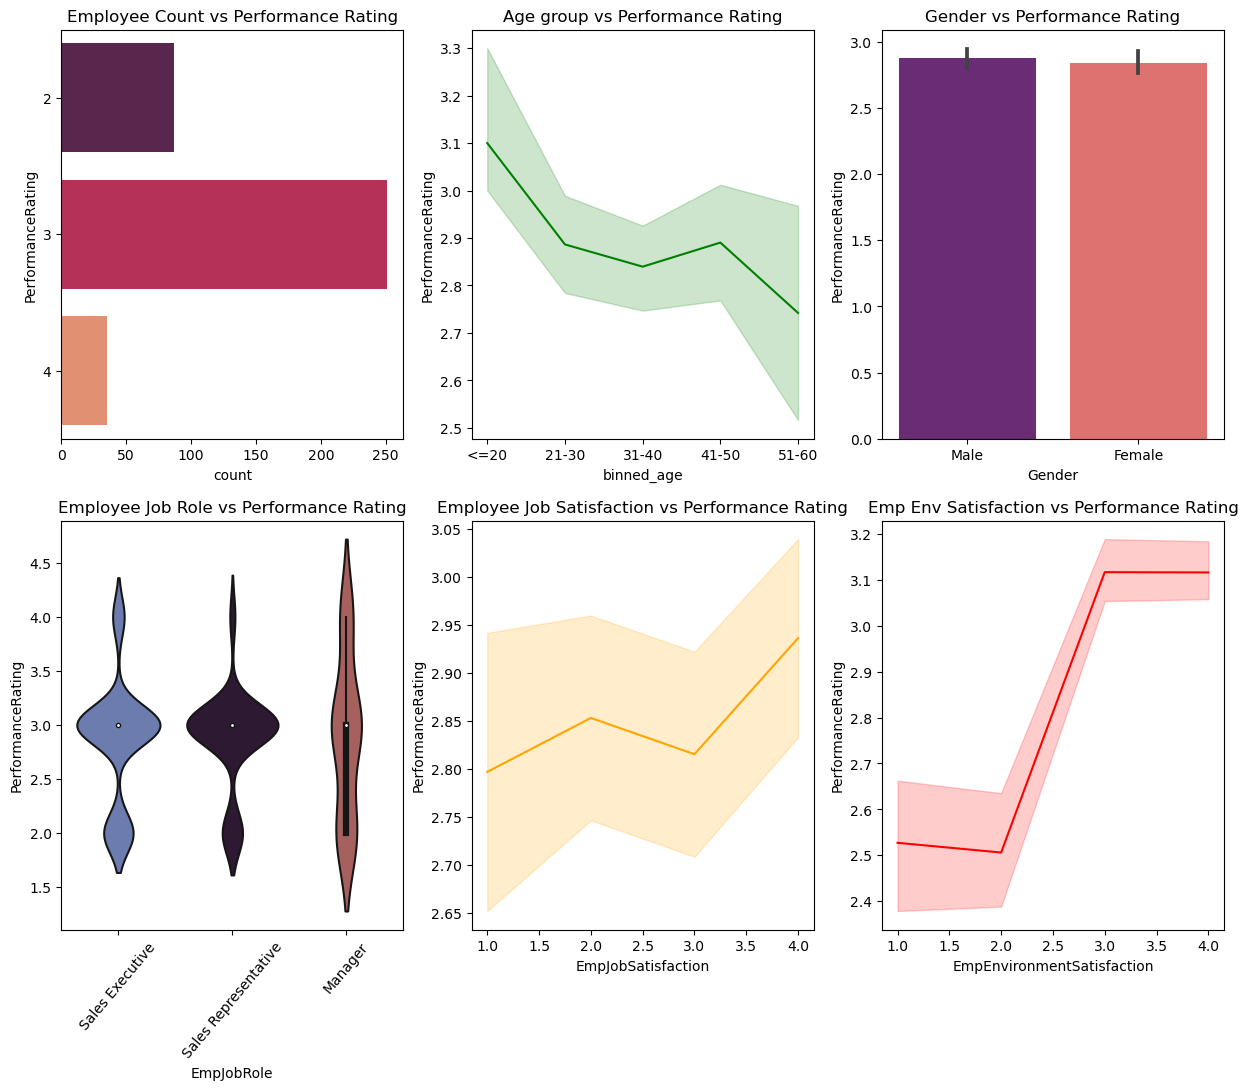

In [13]:
create_employee_performance_plots(sales, dept="Sales")

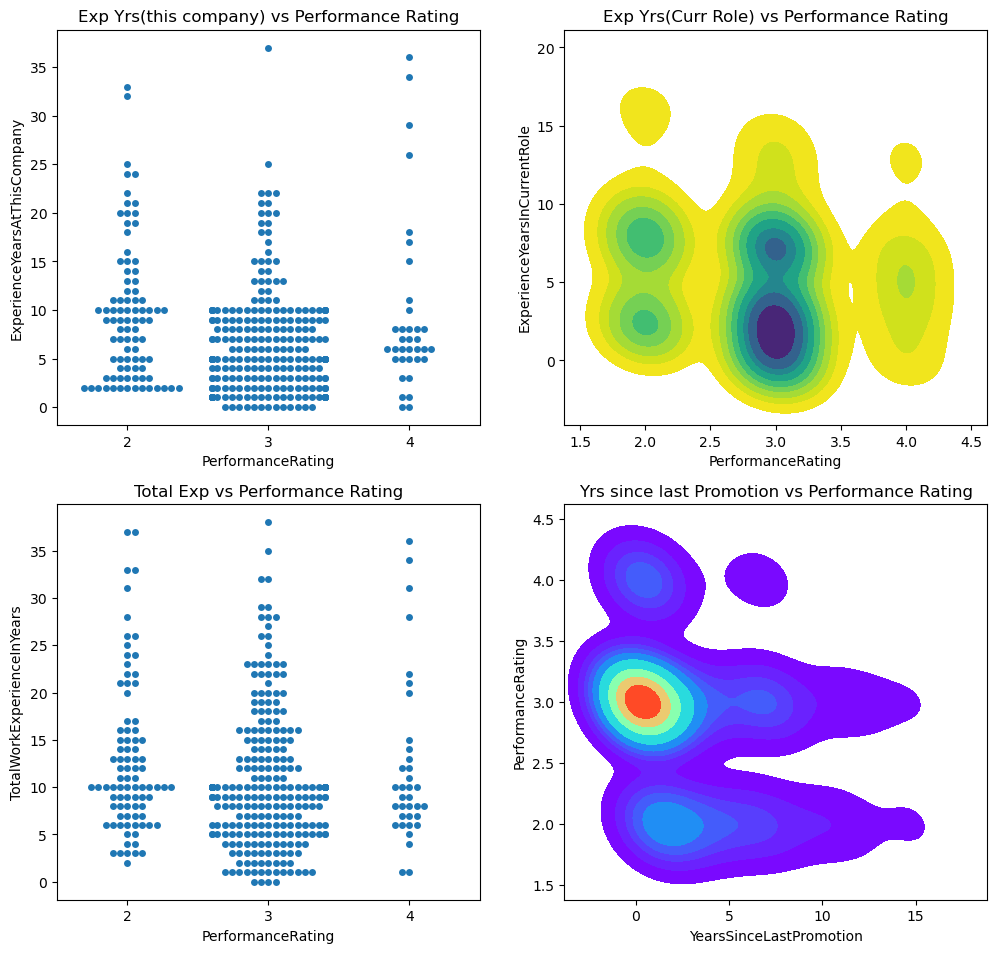

In [14]:
create_performance_plots_num(sales, dept="Sales")

### __Development Department__

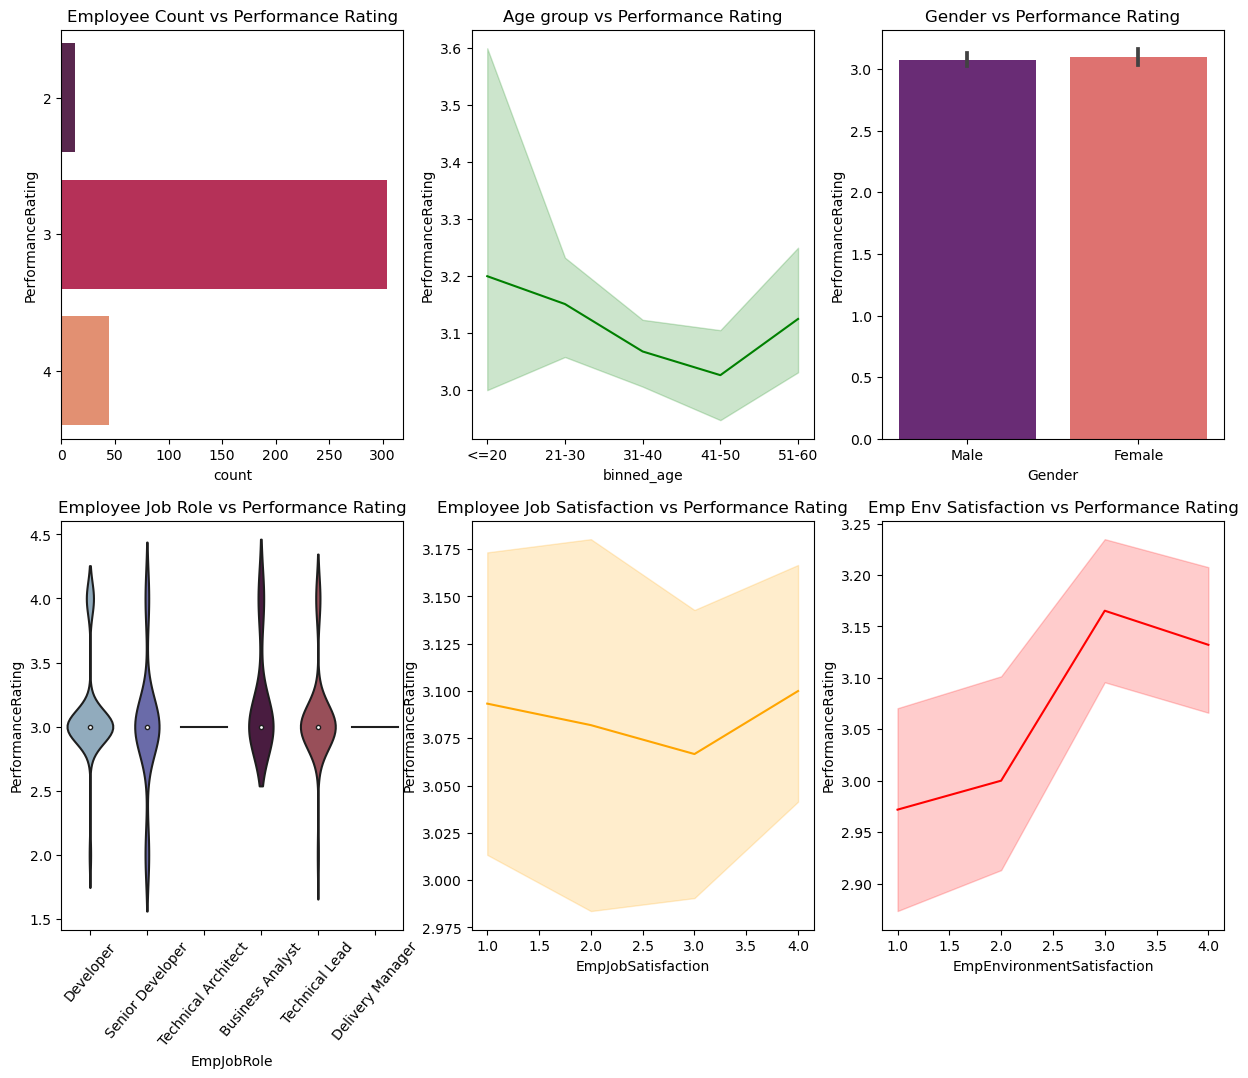

In [15]:
create_employee_performance_plots(development, dept="Development Dept")

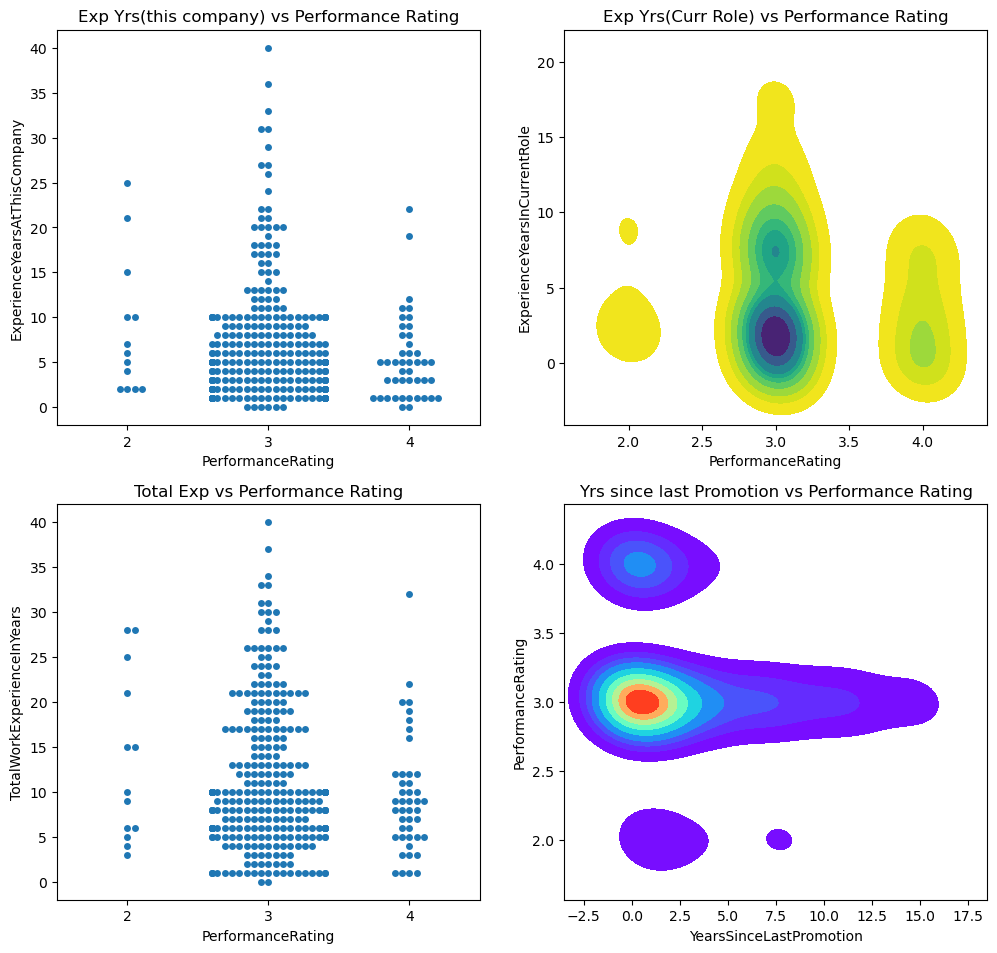

In [16]:
create_performance_plots_num(development, dept="Development Dept")

### __Research & Development Department__

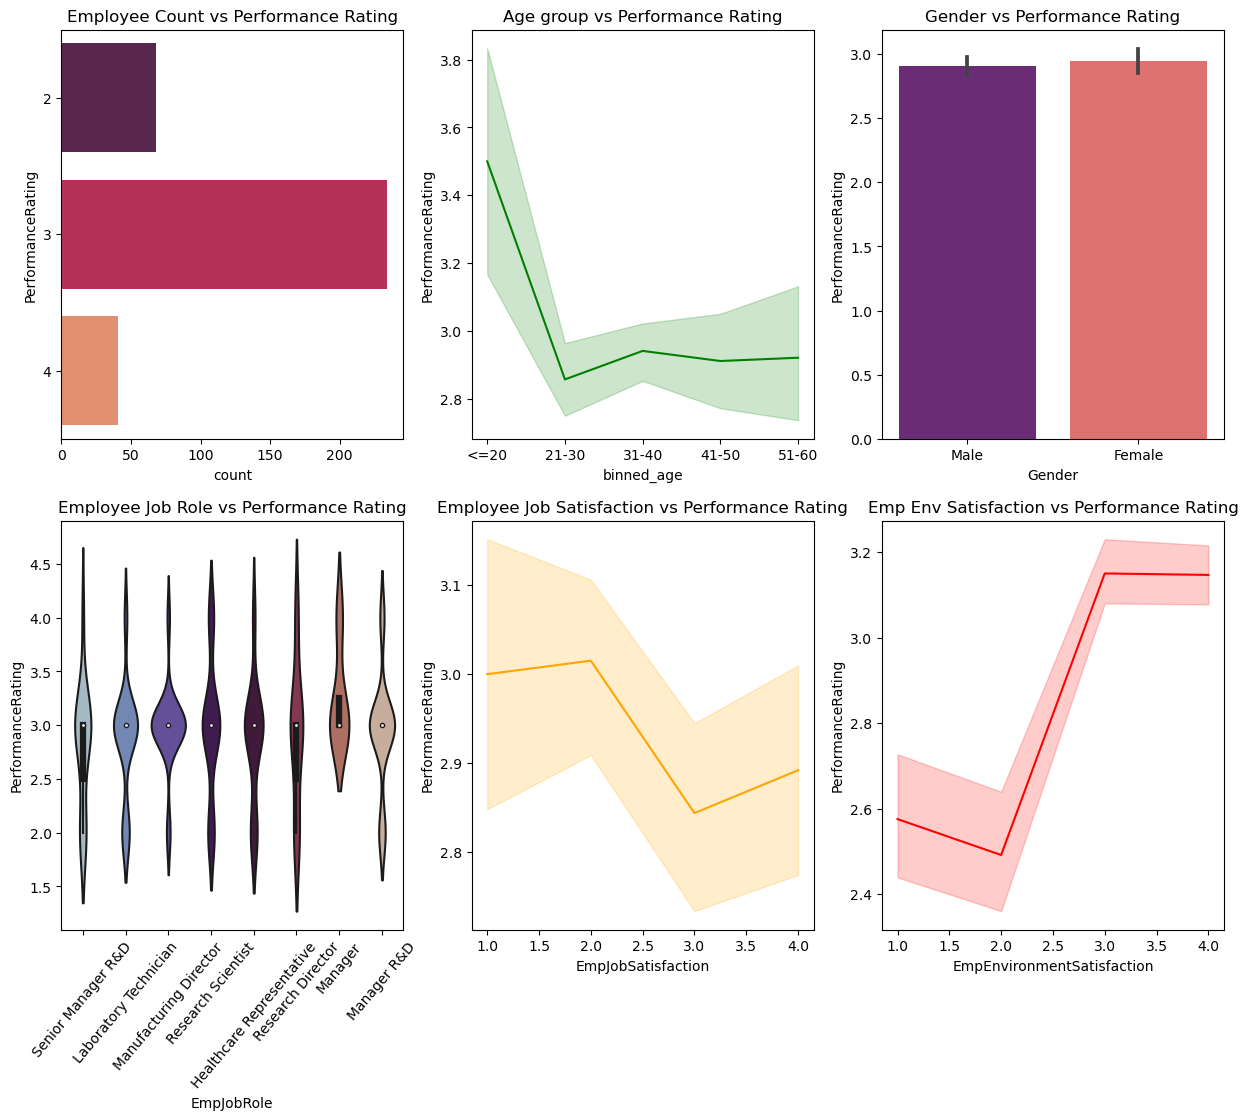

In [17]:
create_employee_performance_plots(rnd, dept="Research & Development Dept")

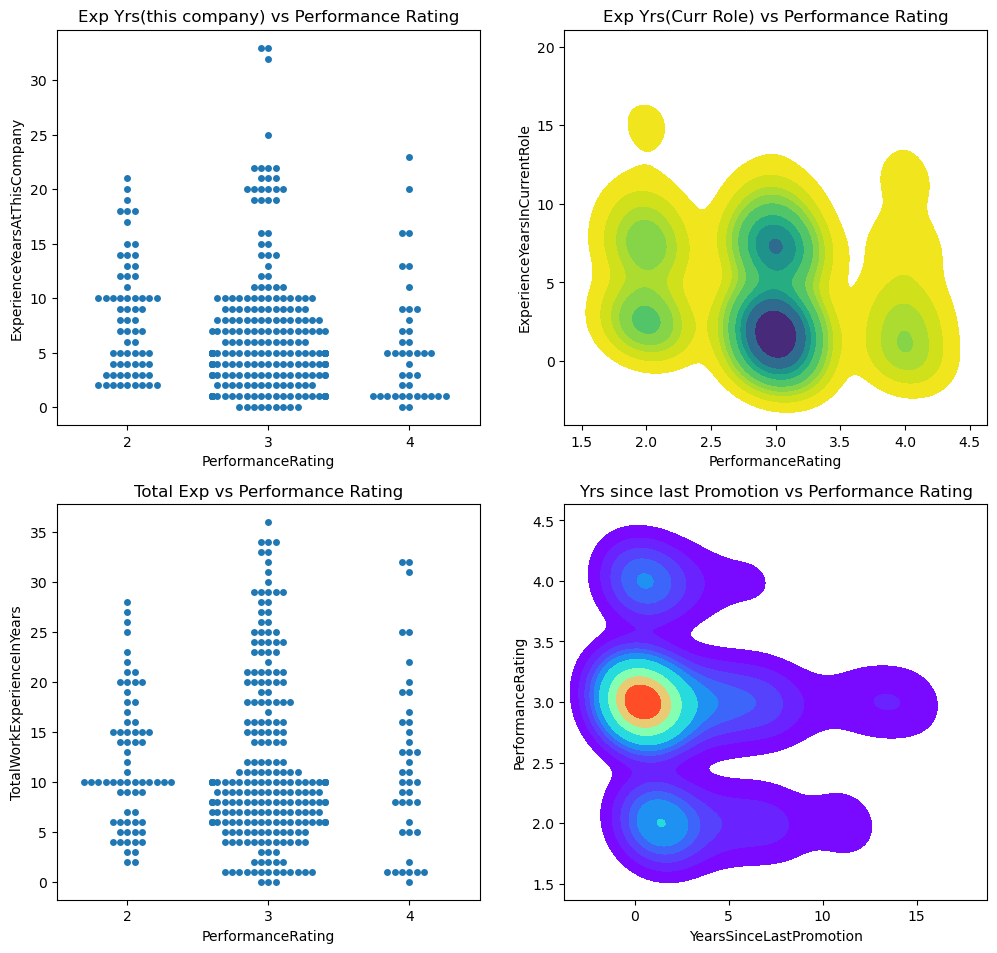

In [18]:
create_performance_plots_num(rnd, dept="Research & Development Dept")

### __Human Resources Department__

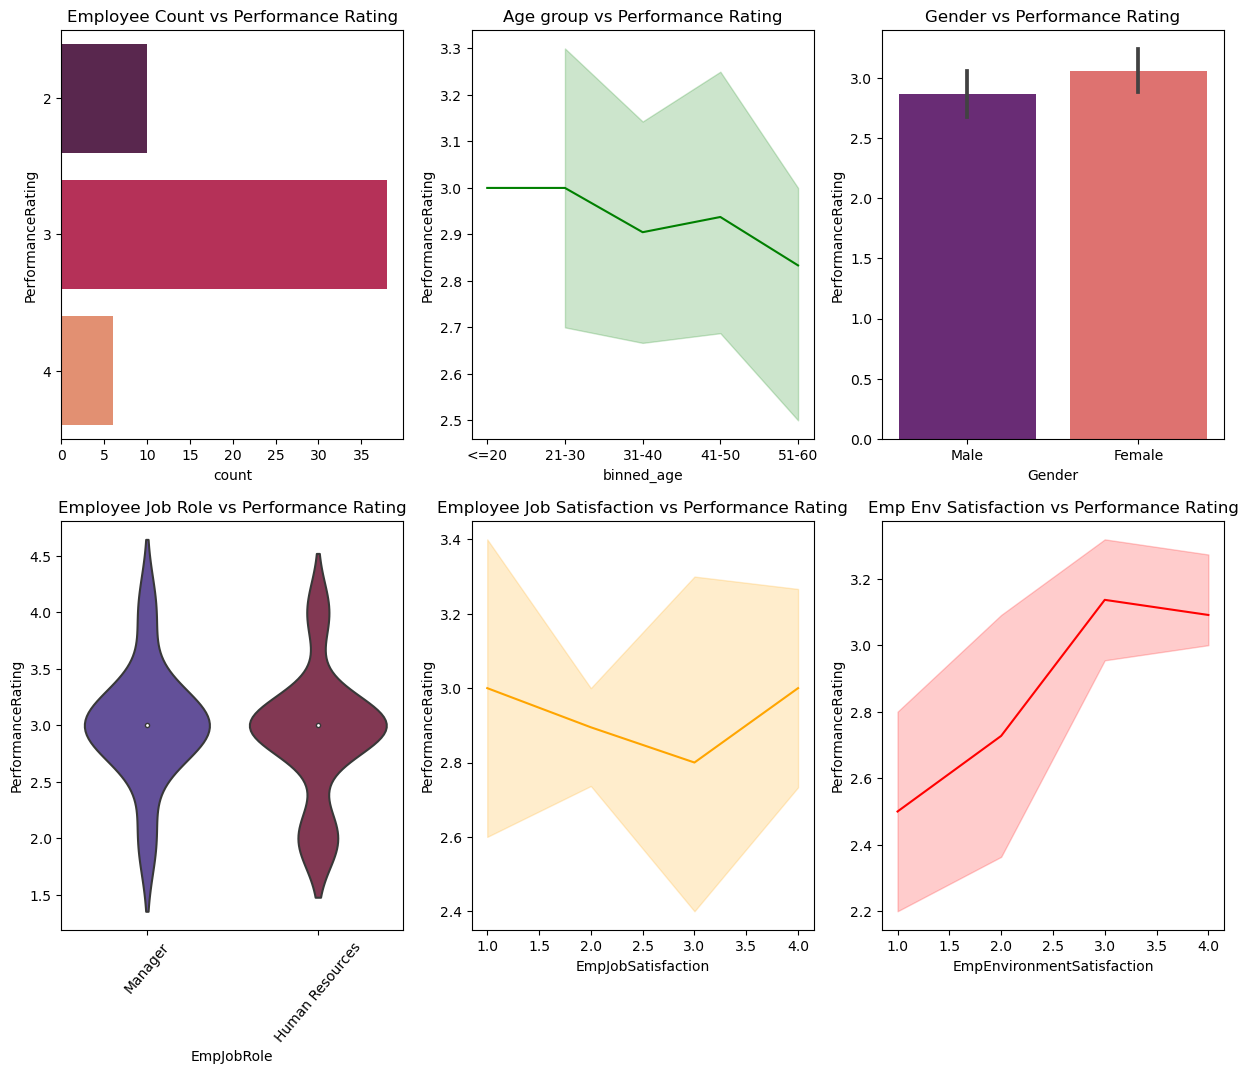

In [19]:
create_employee_performance_plots(hr, dept="Human Resources Dept")

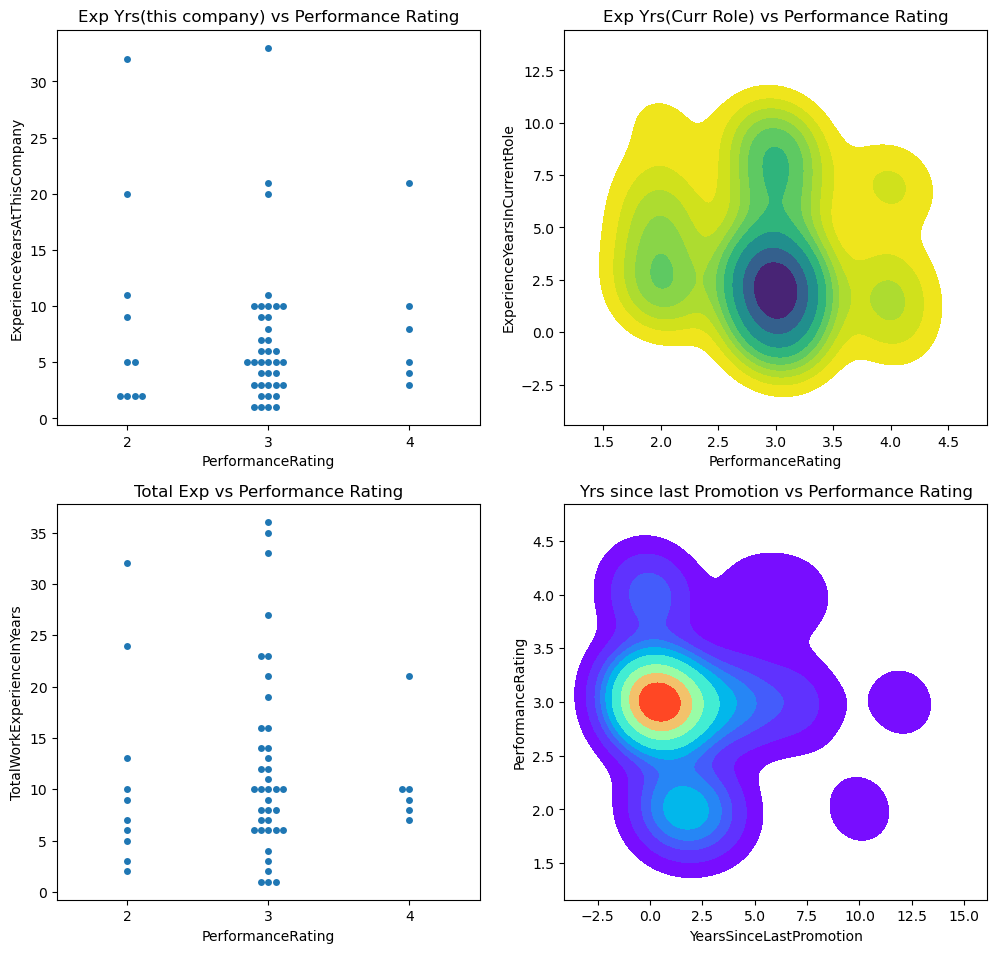

In [20]:
create_performance_plots_num(hr, dept="Human Resource Dept")

### __Finance Department__

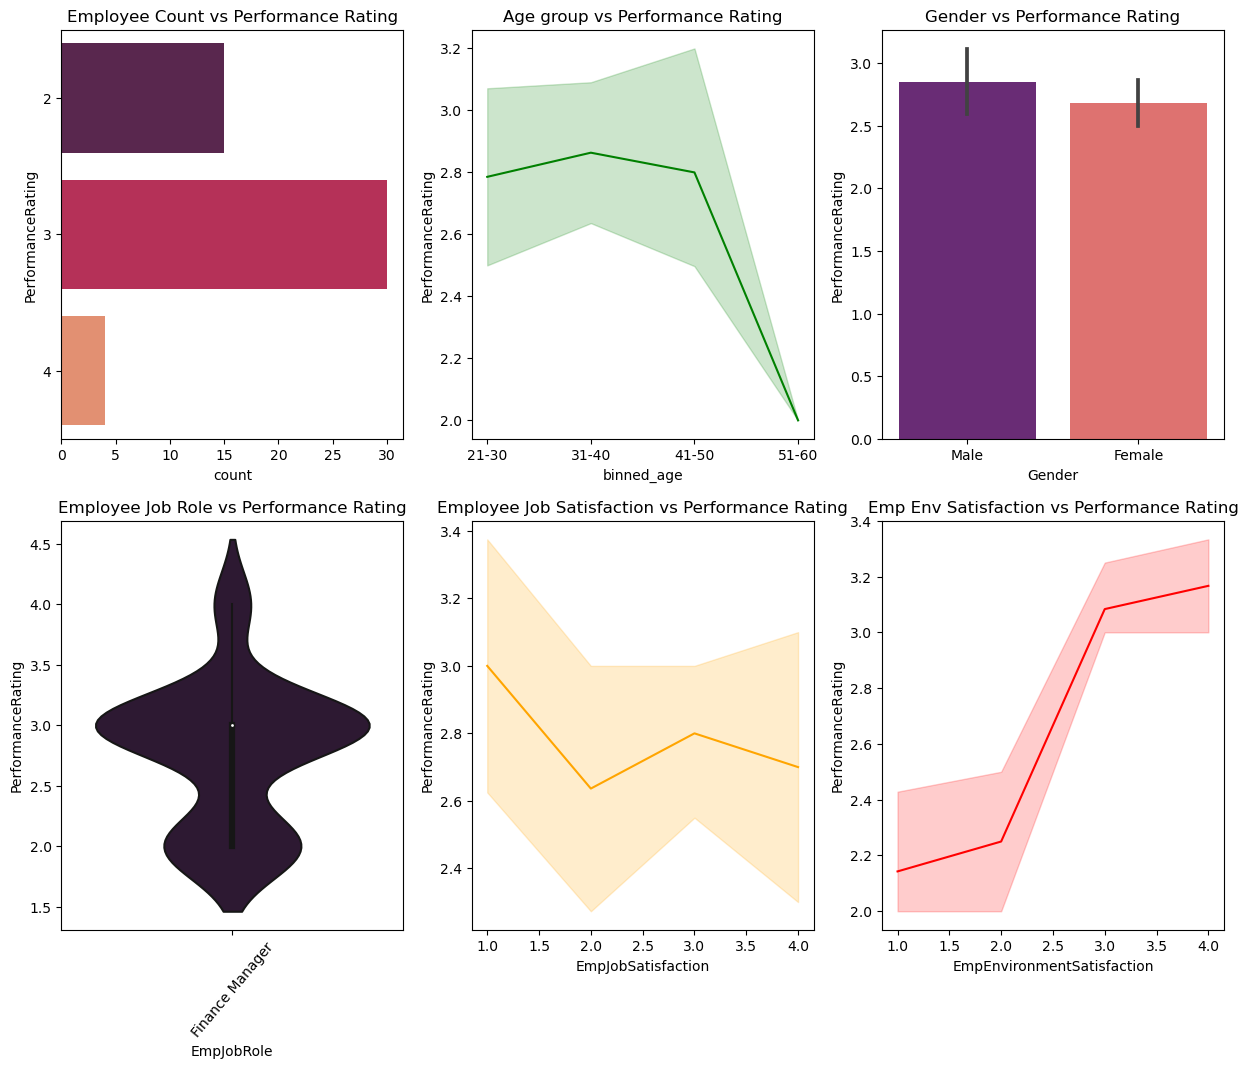

In [21]:
create_employee_performance_plots(finance, dept="Finance Dept")

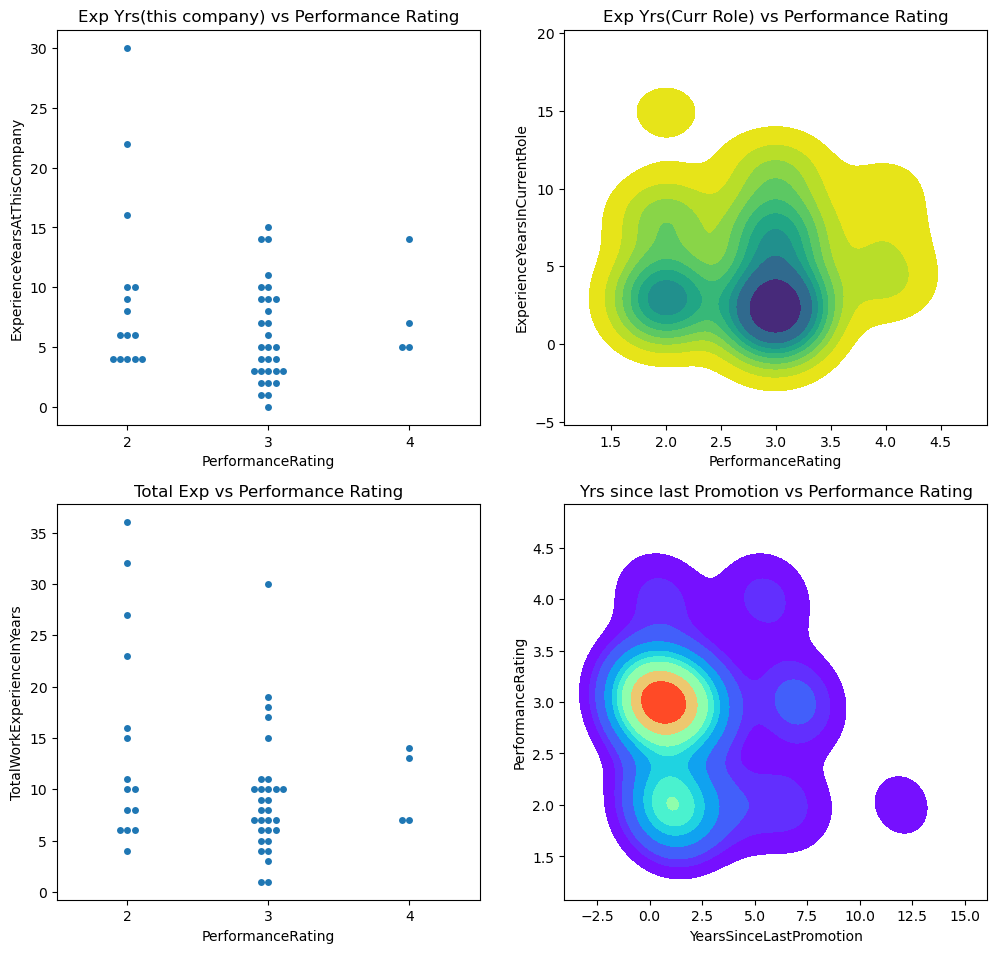

In [22]:
create_performance_plots_num(finance, dept="Finance Dept")

### __Data Science Department__

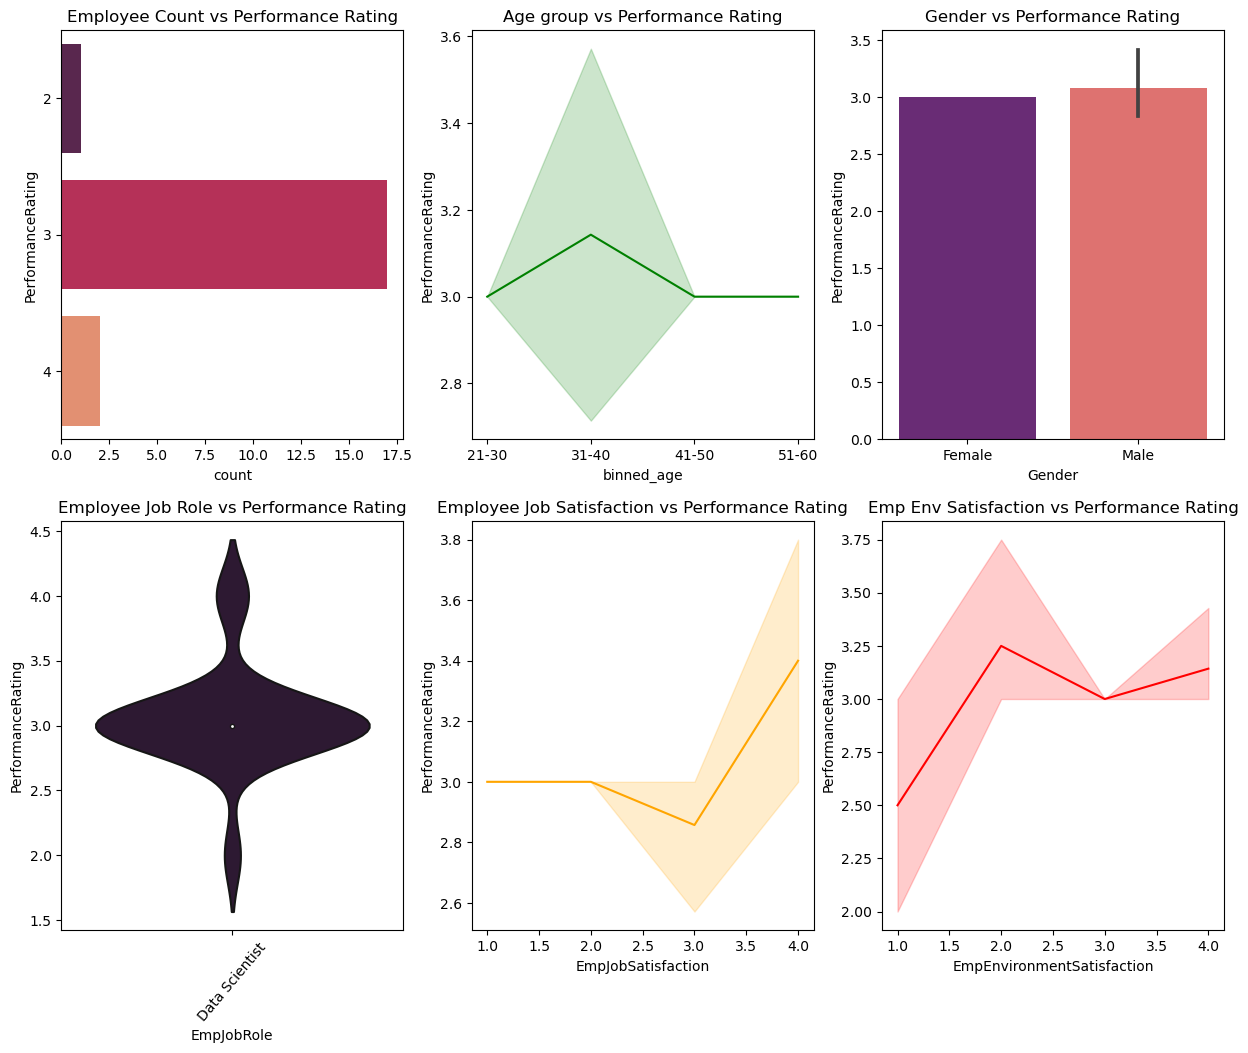

In [24]:
create_employee_performance_plots(data_science, dept="Data Science Dept")

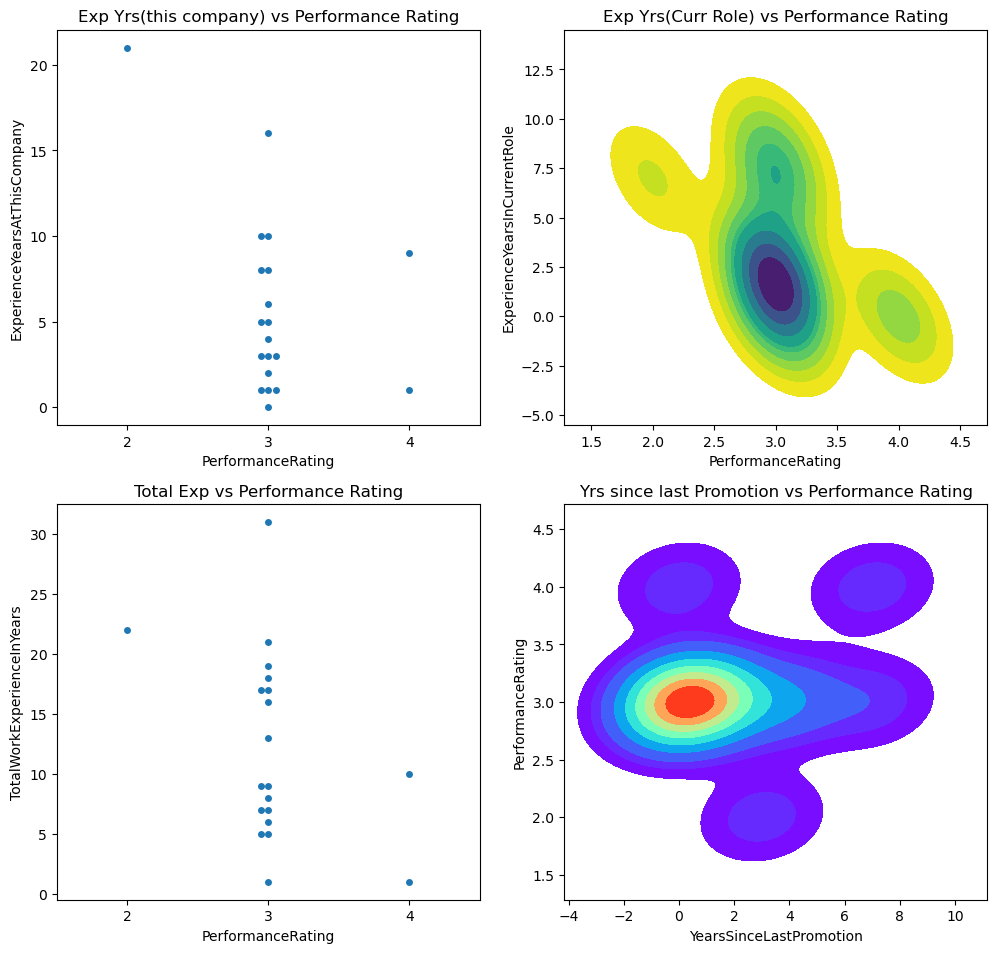

In [25]:
create_performance_plots_num(data_science, dept="Data Science Dept")

## __Department Wise Performance Rating Inferences__

1. __Sales Department__
    - Most of the employees have excellent (3) performance rating
    - Younger age group performs comparatively better than the older age group although the variation is not high
    - Job satisfaction and Environment satisfaction is directly correlated to performance rating so the higher the job and environment satisfaction the higher is the performance
    - Sales Executives and Representatives perform better than their managers in general
    - New employee or the oldest ones have better performance as compared to those who have moderate experience with current company
    - Those who have less experience in current role or are relatively new to their current role out perform the experienced ones
    - Those who have been recently promoted perform better than those whose promotion has not happend for more than 4 years now
    
2. __Development Department__
    - Most of the employees have excellent (3) performance rating
    - Younger age group or the oldest age group out performs the middle aged employees
    - Gender wise performance says female perform slightly better than male
    - Job satisfaction and Environment satisfaction is directly correlated to performance rating so the higher the job and environment satisfaction the higher is the performance
    - Developers and Tech. lead's out perform other job roles on an average
    - Experience in current role does not have much effect on the performance rating of employees 
    - Those who have been recently promoted perform better than those whose promotion has not happend for more than 4 years now
    
3. __Research & Development Department__
    - Most of the employees have excellent (3) performance rating
    - The youngest age group of upto 25 out-performs other age groups by a huge margin
    - Gender wise performance says female perform slightly better than male
    - Environment satisfaction is directly correlated to performance rating so the higher the environment satisfaction the higher is the performance
    - New employee or the oldest ones have better performance as compared to those who have moderate experience with current company
    - Those who have less experience in current role or are relatively new to their current role out perform the experienced ones
    - Those who have been recently promoted perform better than those whose promotion has not happend for more than 4 years now
    
4. __Human Resources__
     - Most of the employees have excellent (3) performance rating
     - age groups upto 30 out perform older age groups
     - Gender wise performance says female out perform male by some considerable margin
     - Environment satisfaction is directly correlated to performance rating so the higher the environment satisfaction the higher is the performance
     
5. __Finance Department__
    - Considerably some amount of low performing employees are present as compared to other departments but the rest do have excellent performance
    - Age group wise those upto 41-50 have good performance
    - Job satisfaction to performance rating is way below the considerable margin
    - Environment satisfaction is directly correlated to performance rating so the higher the environment satisfaction the higher is the performance
    - Sales Executives and Representatives perform better than their managers in general
    - New employee or the oldest ones have better performance as compared to those who have moderate experience with current company
    - Those who have less experience in current role or are relatively new to their current role out perform the experienced ones
    - Those who have been recently promoted perform better than those whose promotion has not happend for more than 4 years now
    
    
6. __Data Science Department__
    - Most of the employees have excellent (3) performance rating
    - All age groups have an excellent peformance rating
    - Job satisfaction and Environment satisfaction is directly correlated to performance rating so the higher the job and environment satisfaction the higher is the performance
    - Those with low experience in current role tend to perform higher which is relatable as these are the ones trying to get the hang of the department

## Most Important Features

### __Using Random Forest Classifer__

In [27]:
# lets prepare our dataset into categorical and numerical data

cat_df = df.select_dtypes(['object','bool'])
num_df = df.select_dtypes(['int64', 'float64'])

# Applying the OneHotEncoding technique for Categorical features
cat_df = pd.get_dummies(cat_df)

# concatonate the categorical and numerical datasets to make one prepared dataset for RandomForest model
ml_df = pd.concat([cat_df, num_df], axis=1)

# Splitting the dataset into X=features and y=target 
X = ml_df.iloc[:, :-1]
y = ml_df.PerformanceRating

# now lets perform the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=44)

#### Balancing the dataset using imblearn

In [29]:
# Lets balance the dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define oversampling and undersampling techniques
oversampling = SMOTE()
undersampling = RandomUnderSampler()

# Define pipeline steps
steps = (('o', oversampling), ('u', undersampling))
pipeline = Pipeline(steps=steps)

# Apply the pipeline
X_bal, y_bal = pipeline.fit_resample(X_train, y_train)

#### Training the model

In [30]:
# Now lets train our Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': 800,
    'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : 0,
    'n_jobs': -1,
    'verbose': 0
}

model = RandomForestClassifier(**params)

model.fit(X_bal, y_bal)

y_predict = model.predict(X_test)

<BarContainer object of 61 artists>

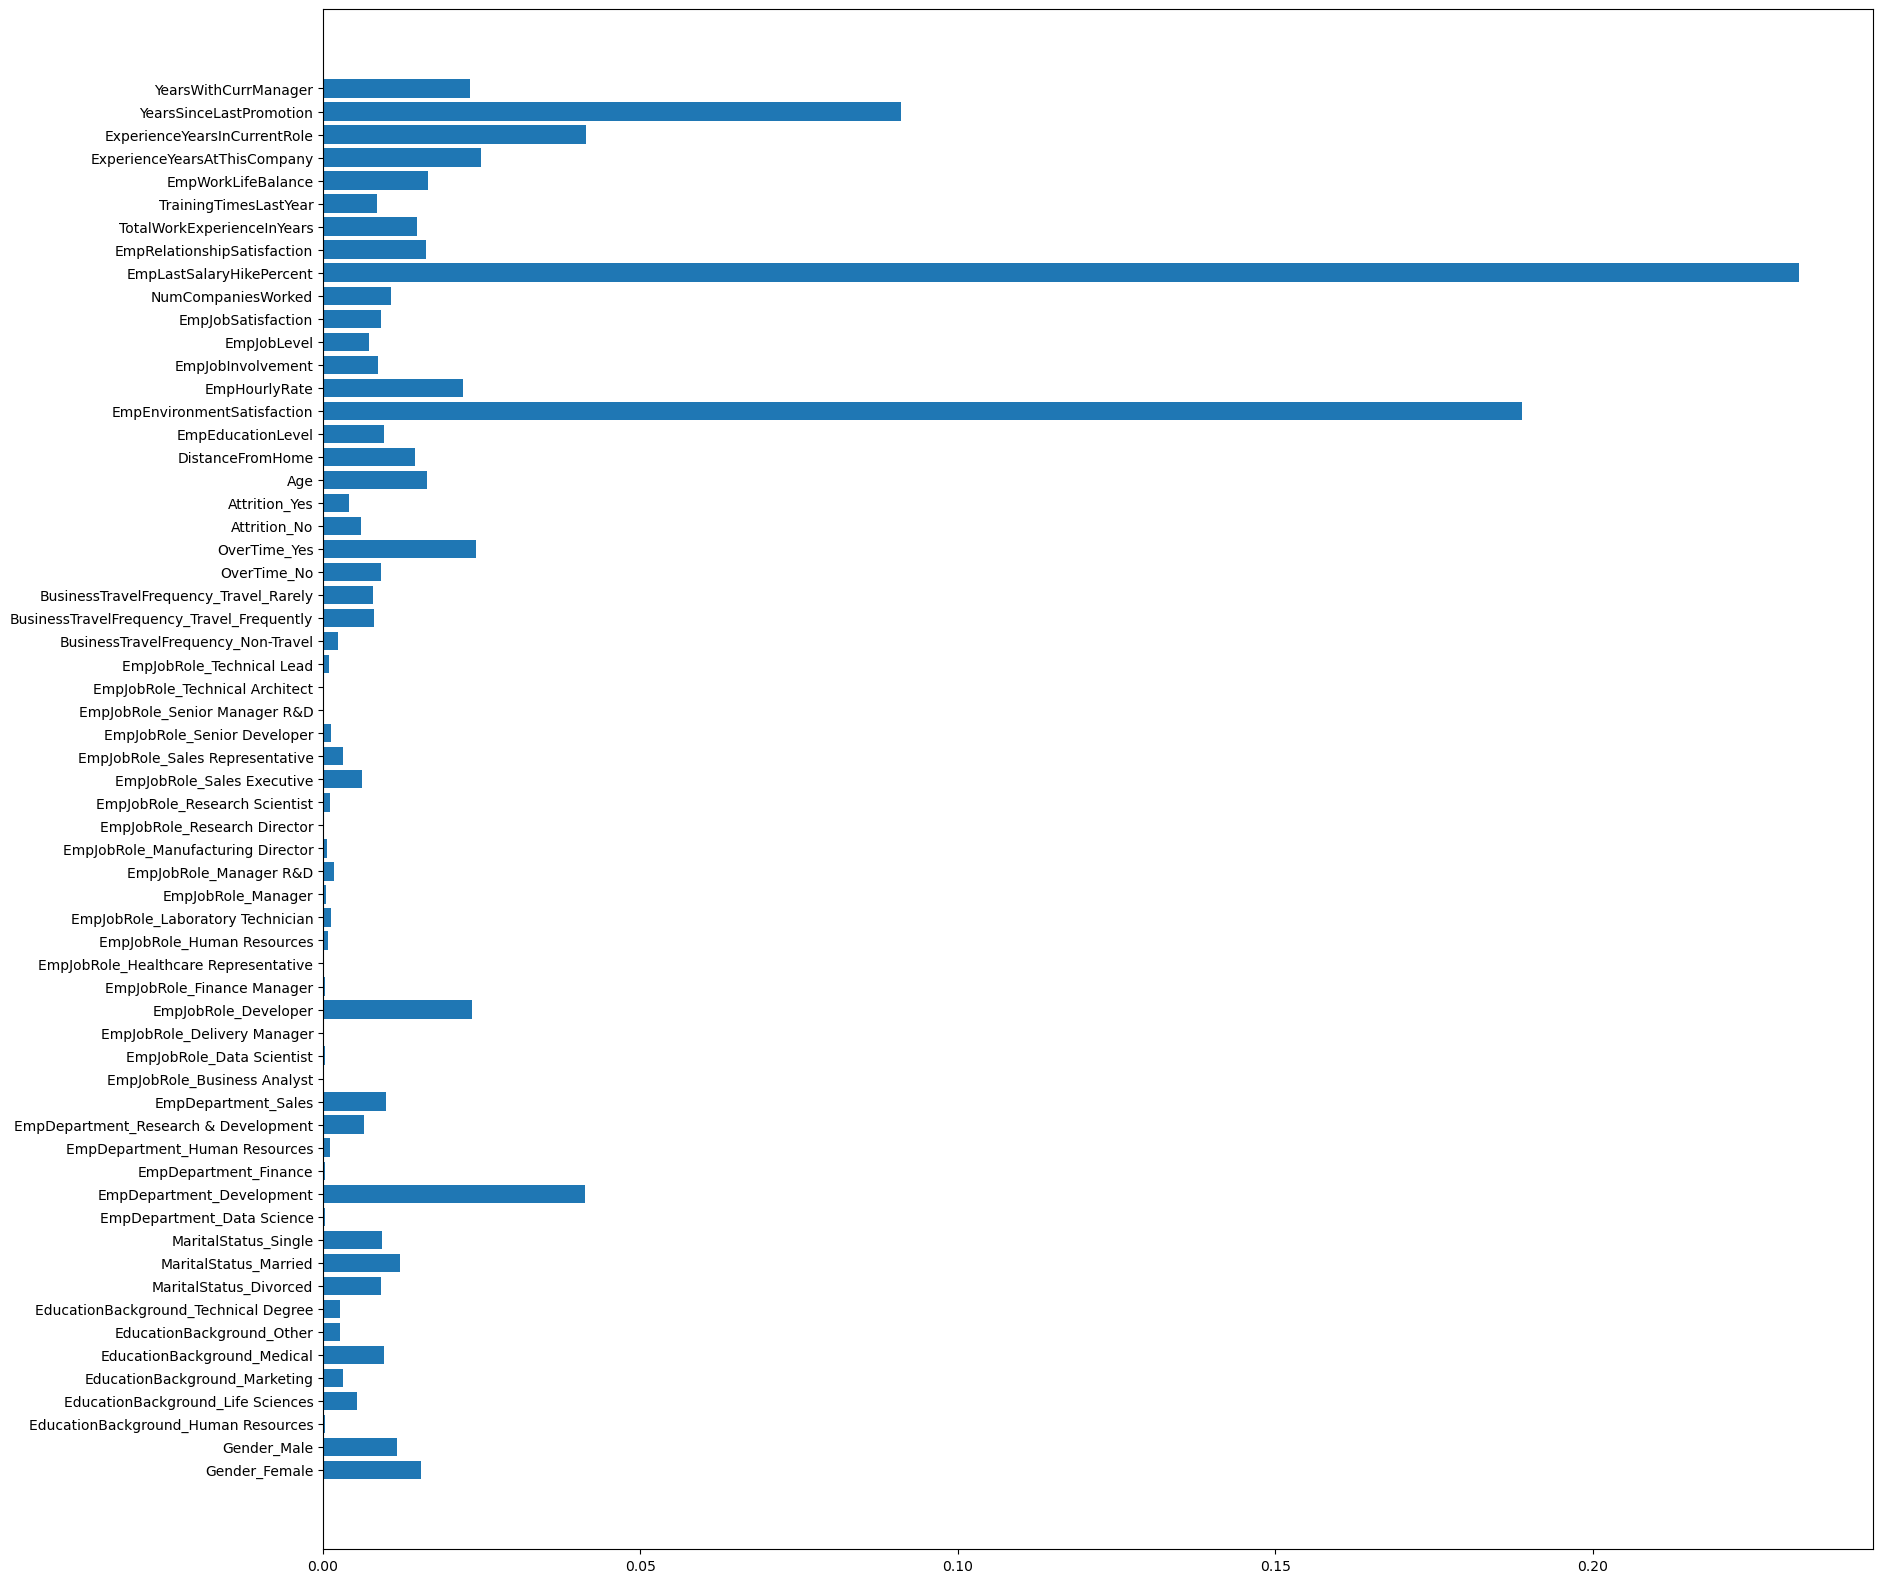

In [31]:
plt.figure(figsize=(20,20))
plt.barh(X.columns, model.feature_importances_)

### __Most Important Features according to Random Forest Classifier__

Random Forest Classifier determines the importance of features through a metric known as feature importance. This metric is based on the contribution of each feature to the overall performance of the ensemble of decision trees. The importance of a feature is calculated during the training phase.

In scikit-learn, the feature importance scores can be accessed after training the Random Forest model. The attribute feature_importances_ provides an array of importance scores, where each element corresponds to a feature in the input data.

- ___According to Random Forest Classifier the following 3 features are the most important___
1. EmpLastSalaryHikePercent - Last salary hike percentage of employee
2. EmpEnvironmentSatisfaction - How satisfied an employee is with the work environment
3. YearsSinceLastPromotion - How recent is the employee's last promotion

### __Using XGBoost__

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#Encoding the target variable into [0,1,2] class instead of [2,3,4] to be recognised by the XGBoost ML
y_bal_encoded = label_encoder.fit_transform(y_bal)

In [36]:
from xgboost import XGBClassifier

params = {
    'n_estimators': 800,
    'use_label_encoder': True, 
    'learning_rate': 0.01,
    'max_depth': 8,
    'tree_method': 'auto',
    'objective' : 'multi:softprob',
    'random_state' : 0,
    'n_jobs': -1,
    'booster': 'gbtree',
    'eval_metric': 'merror'
}

model = XGBClassifier(**params)

model.fit(X_bal, y_bal_encoded)

y_predict = model.predict(X_test)

<BarContainer object of 61 artists>

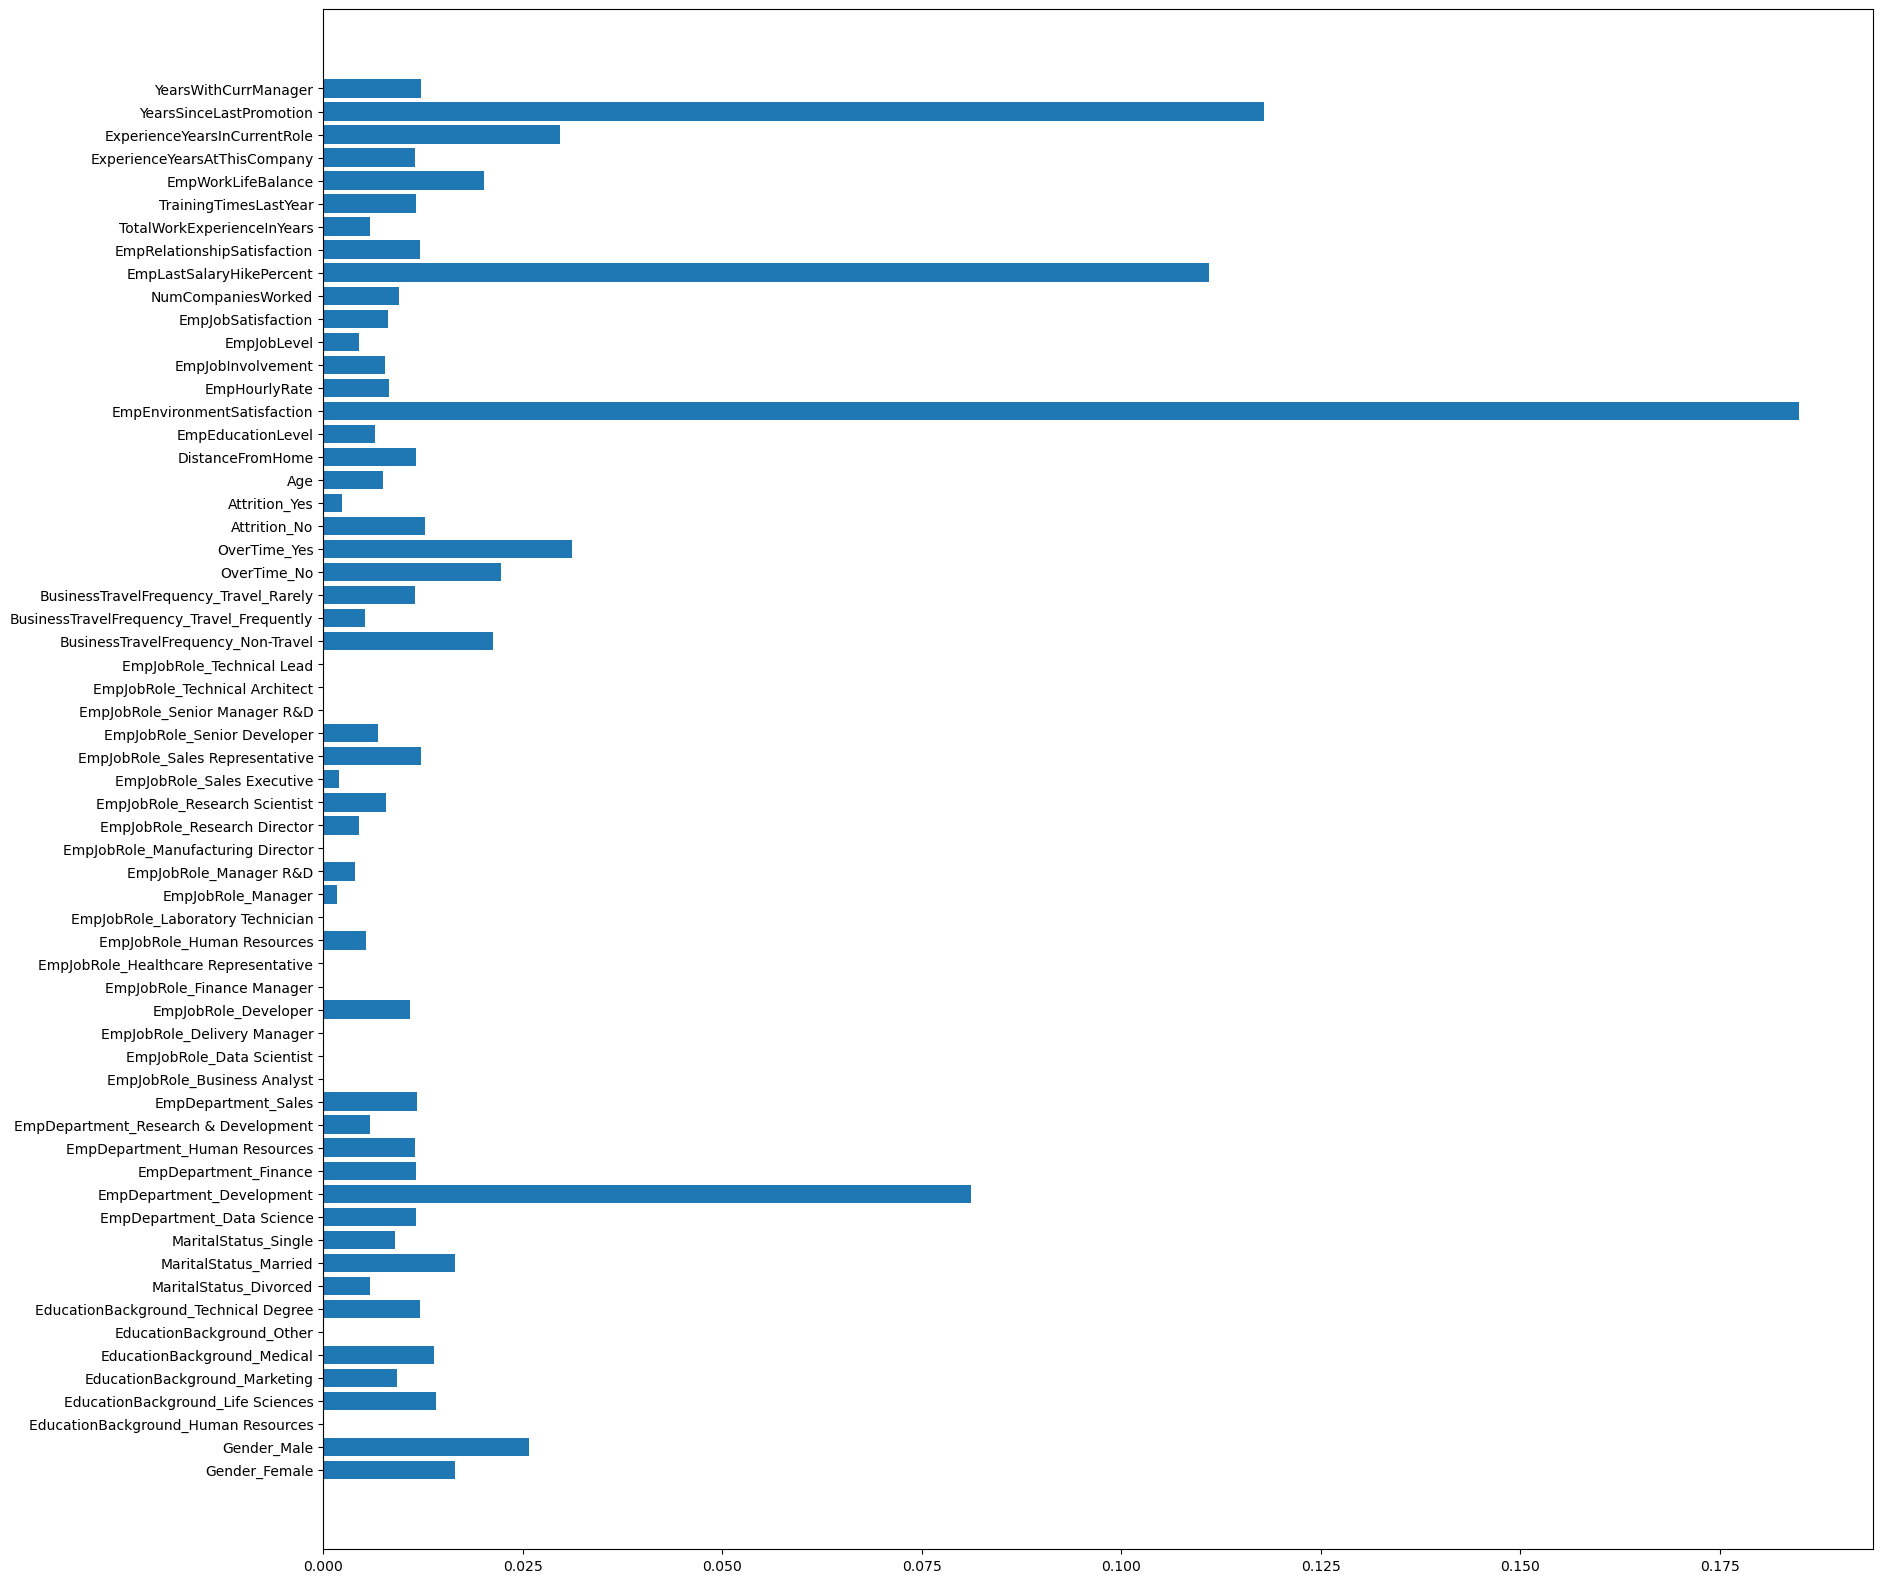

In [37]:
plt.figure(figsize=(20,20))
plt.barh(X.columns, model.feature_importances_)

### __Most Important Features according XGBoost Classifier__

XGBoost (Extreme Gradient Boosting) Classifier determines feature importance in a way similar to other tree-based ensemble methods, such as Random Forest. XGBoost uses a metric called "Gain" to quantify the contribution of each feature to the model's performance. The Gain is a measure of the improvement in accuracy or reduction in loss that a particular feature brings when it is used in a decision tree split. 

In scikit-learn's XGBoost implementation, you can access feature importance scores after training the XGBoost model. The feature_importances_ attribute provides an array of importance scores.

- ___According to XGBoost Classifier the following 3 features are the most important___
1. EmpLastSalaryHikePercent - Last salary hike percentage of employee
2. EmpEnvironmentSatisfaction - How satisfied an employee is with the work environment
3. YearsSinceLastPromotion - How recent is the employee's last promotion

## __3 MOST IMPORTANT FEATURES__

### In conclusion the most important features are : 
1. __EmpLastSalaryHikePercent__
2. __EmpEnvironmentSatisfaction__
3. __YearsSinceLastPromotion__